In [1]:
def barPlot(df, feature):
    # Exploration of this feature
    subclasses = df[feature].value_counts()
    
    # Plotting the distribution of this feature
    plt.figure(figsize=(10, 6))
    plt.bar(subclasses.index, subclasses.values)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('Distribution of ' + feature)
    plt.xticks(subclasses.index, subclasses.index)
    plt.show()

def plot(df, feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title('Distribution of'+feature)
    plt.show()

def describe_data_based_on_target(df, feature, target):
    
    print(df.groupby(feature)[target].describe())

    # Analyzing the importance of overall quality
    class_targets_means = df.groupby(feature)[target].mean().sort_values(ascending=False)
    class_targets_medians = df.groupby(feature)[target].median().sort_values(ascending=False)

    print("\nMean "+target+" by "+feature+":")
    print(class_targets_means)
    print("\nMedian "+target+" by "+feature+":")
    print(class_targets_medians)

def boxPlot(df, feature, target):
    # Plotting the relationship between building class and target
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y=target, data=df)
    plt.title(feature+' vs ' + target)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

def correlation(df, feature, target):
    # Correlation analysis
    correlation = df[feature].corr(df[target])
    print(f"The correlation between {feature} and {target} is: {correlation:.2f}")

## building class

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats


df = pd.read_csv('train.csv')
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
print('number of unique values in col :')
for c in df.columns:
    unique = len(df[c].unique())
    if (unique <= 20):
        print('-----> CATEGORICAL -----> ', end='')
    print(c,'= ', unique)

number of unique values in col :
Id =  1460
-----> CATEGORICAL -----> MSSubClass =  15
-----> CATEGORICAL -----> MSZoning =  5
LotFrontage =  111
LotArea =  1073
-----> CATEGORICAL -----> Street =  2
-----> CATEGORICAL -----> Alley =  3
-----> CATEGORICAL -----> LotShape =  4
-----> CATEGORICAL -----> LandContour =  4
-----> CATEGORICAL -----> Utilities =  2
-----> CATEGORICAL -----> LotConfig =  5
-----> CATEGORICAL -----> LandSlope =  3
Neighborhood =  25
-----> CATEGORICAL -----> Condition1 =  9
-----> CATEGORICAL -----> Condition2 =  8
-----> CATEGORICAL -----> BldgType =  5
-----> CATEGORICAL -----> HouseStyle =  8
-----> CATEGORICAL -----> OverallQual =  10
-----> CATEGORICAL -----> OverallCond =  9
YearBuilt =  112
YearRemodAdd =  61
-----> CATEGORICAL -----> RoofStyle =  6
-----> CATEGORICAL -----> RoofMatl =  8
-----> CATEGORICAL -----> Exterior1st =  15
-----> CATEGORICAL -----> Exterior2nd =  16
-----> CATEGORICAL -----> MasVnrType =  5
MasVnrArea =  328
-----> CATEGORICAL -

In [9]:
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [10]:
df = df
for c in df.columns:
    if np.issubdtype(df[c].dtype, np.number):
        df = df.fillna(df[c].mean())
    else:
        mode_value = df[c].mode()[0]
        df = df.fillna(mode_value) # preprocessed df
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

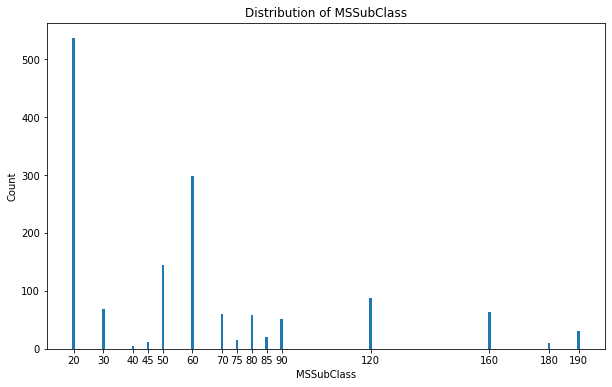

The correlation between MSSubClass and SalePrice is: -0.08


In [12]:
barPlot(df, 'MSSubClass')
correlation(df, 'MSSubClass', 'SalePrice')

The "MSSubClass" feature represents the building class of each row. To understand its importance, we begin by loading the dataset using the pandas library. Then, we explore the distribution of the "MSSubClass" feature by counting the occurrences of each building class using the value_counts() function.

Next, we plot the distribution of the "MSSubClass" feature using a bar chart to visualize the frequency of each class. This helps us understand the distribution.

Finally, we analyze the importance of the "MSSubClass" feature by grouping the dataset by building class and calculating the median and mean sale price for each class using the groupby(), mean() and median() methods. The resulting median and mean sale prices are sorted in descending order to identify any notable differences between the building classes.

By examining the distribution, mean and median sale prices of different building classes, we can gain insights into the importance of the "MSSubClass" feature. It helps us understand how the architectural style or type of dwelling influences the prices of houses in the Ames housing market. 

As we can see, both mean and median values are highest when "MSSubClassh" equals 60 or 120 and lowest when it equals 180 or 30. This means "2-STORY 1946 & NEWER" or "1-STORY PUD (Planned Unit Development) - 1946 & NEWER" are more valuable but "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER" and "1-STORY 1945 & OLDER" are less.

This information can be valuable for various purposes, such as real estate market analysis, property valuation, and predicting house prices based on building class characteristics.

## overall quality

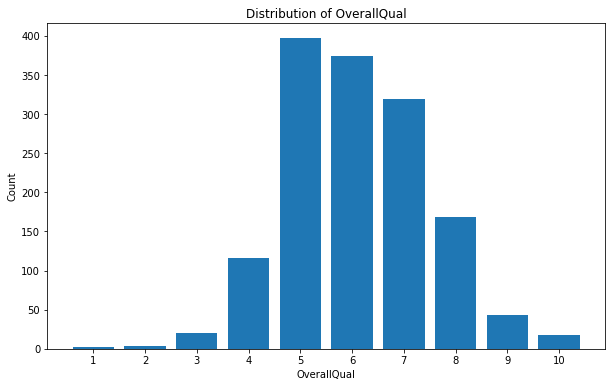

In [13]:
barPlot(df, 'OverallQual')

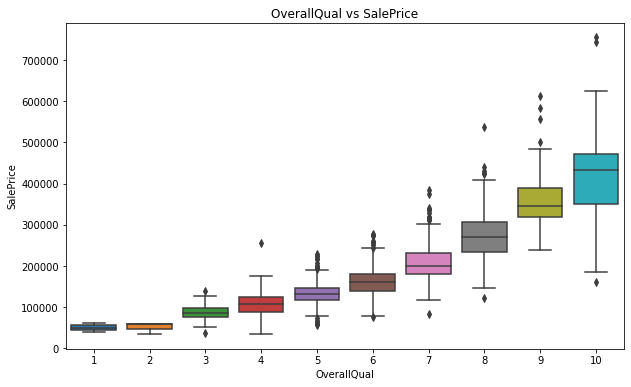

The correlation between OverallQual and SalePrice is: 0.79


In [15]:
boxPlot(df, 'OverallQual', 'SalePrice')
correlation(df, 'OverallQual', 'SalePrice')

In [16]:
describe_data_based_on_target(df, 'OverallQual', 'SalePrice')

             count           mean            std       min       25%  \
OverallQual                                                            
1              2.0   50150.000000   15344.217152   39300.0   44725.0   
2              3.0   51770.333333   14254.200796   35311.0   47655.5   
3             20.0   87473.750000   24688.567399   37900.0   75500.0   
4            116.0  108420.655172   29022.003886   34900.0   88000.0   
5            397.0  133523.347607   27107.330927   55993.0  118000.0   
6            374.0  161603.034759   36090.182933   76000.0  139125.0   
7            319.0  207716.423197   44466.259414   82500.0  179470.0   
8            168.0  274735.535714   63898.902253  122000.0  234557.5   
9             43.0  367513.023256   81278.174849  239000.0  318980.5   
10            18.0  438588.388889  159785.491058  160000.0  349375.0   

                  50%       75%       max  
OverallQual                                
1             50150.0   55575.0   61000.0  
2  

We perform exploratory data analysis (EDA) on the dataset. We calculate summary statistics such as count, mean, standard deviation, minimum, and maximum sale prices for each overall quality category using groupby() and describe(). This gives us an overview of the distribution of sale prices based on different overall quality levels.

To visualize the relationship between overall quality and sale price, we create a box plot using sns.boxplot() from seaborn. This plot shows the median, quartiles, and outliers of the sale prices for each category of overall quality. The x-axis represents the overall quality levels, and the y-axis represents the sale prices.

Finally, we calculate the person correlation coefficient between overall quality and sale price using corr() function from pandas. The correlation coefficient ranges from -1 to 1 and displays the strength and direction of the linear relationship between the two variables. A positive correlation indicates that as overall quality increases, the sale price tends to increase as well.

# 1st test:

In [17]:
stat, p = stats.normaltest(df['OverallQual'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=11.905, p=0.003
Probably not Gaussian


This is an analysis of the normality of a variable using a normality test. The variable under consideration is 'OverallQual' from the given DataFrame. The normality test used in this analysis is the normaltest from the scipy.stats module.

The normaltest calculates a statistic and p-value to assess whether the variable follows a Gaussian (normal) distribution. In this analysis, the normaltest was conducted on the 'OverallQual' variable, resulting in a statistic value of 11.9 and a p-value of 0.003.

To interpret the results, the p-value is compared to a significance level (commonly chosen as 0.05). If the p-value is greater than the significance level, it suggests that the variable is likely to follow a Gaussian distribution. On the other hand, if the p-value is less than the significance level, it indicates that the variable is probably not Gaussian.

For the given dataset, the normaltest resulted in a p-value of 0.003. Since the p-value is greater than the significance level, we cannot conclude that the 'OverallQual' variable is normally distributed.

It is important to note that deviations from normality may affect the validity of certain statistical tests and assumptions. Thus, it is essential to consider the normality of the variable when selecting appropriate statistical techniques and interpreting the results.

## heating

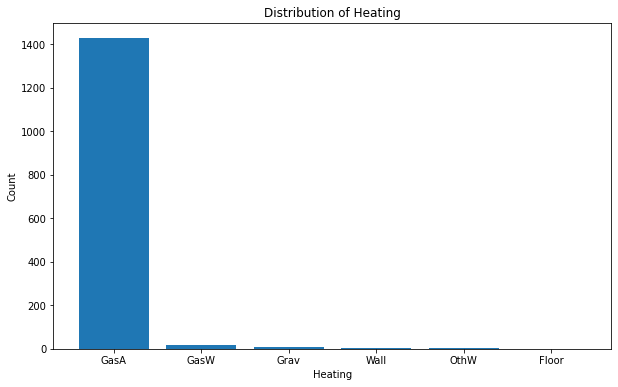

In [18]:
barPlot(df, 'Heating')

# 2nd test:

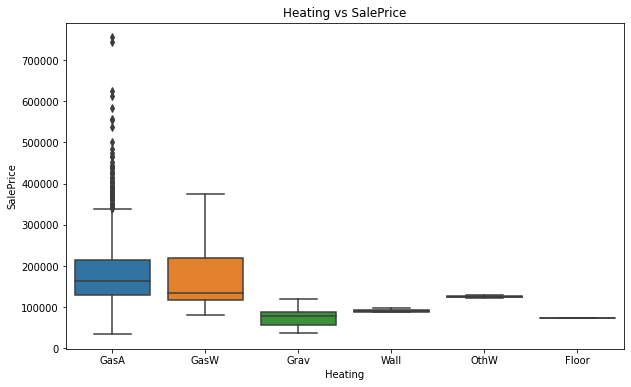

                  sum_sq      df         F    PR(>F)
C(Heating)  1.329359e+11     5.0  4.259819  0.000753
Residual    9.074975e+12  1454.0       NaN       NaN


In [19]:
boxPlot(df, 'Heating', 'SalePrice')


import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('SalePrice ~ C(Heating)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

This is an analysis of the effect of different heating types on sale prices using an ANOVA (Analysis of Variance) test. To begin the analysis, a box plot was created to visualize the distribution of sale prices across different heating types. The box plot provides insights into the central tendency, variability, and potential outliers within each heating category.

Following the exploratory visualization, an ANOVA model was fitted to assess whether the heating types have a significant impact on sale prices. The ANOVA model was constructed using the `ols` function from the `statsmodels.formula.api` module. The formula 'SalePrice ~ C(Heating)' specifies that the sale price is the dependent variable, while 'Heating' is treated as a categorical independent variable.

The ANOVA test was then performed using the `anova_lm` function from the `statsmodels.api` module. This test generates an ANOVA table, which provides statistical metrics such as the sum of squares, degrees of freedom, F-statistic, and associated p-values. These metrics allow us to evaluate the significance of the differences in means among the heating types.

The sum of squares (sum_sq) for the variable "Heating" is 1.329359e+11, indicating the amount of variability explained by the different types of heating.

The degrees of freedom (df) for "Heating" is 5, which represents the number of categories within the variable.

The F-statistic (F) is 4.259819, which is the ratio of between-group variability to within-group variability. It measures the significance of the differences among the means of the different heating types.

The p-value (PR(>F)) for "Heating" is 0.000753, which is below the typical significance level of 0.05. This indicates that there is strong evidence to reject the null hypothesis and conclude that there is a statistically significant effect of the different types of heating on sale prices.

The sum of squares (sum_sq) and degrees of freedom (df) for the residual term (Residual) represent the variability that is not explained by the "Heating" variable.

In summary, the ANOVA test suggests that there is a significant effect of the different types of heating on sale prices in the housing dataset you analyzed.

## GrLivArea

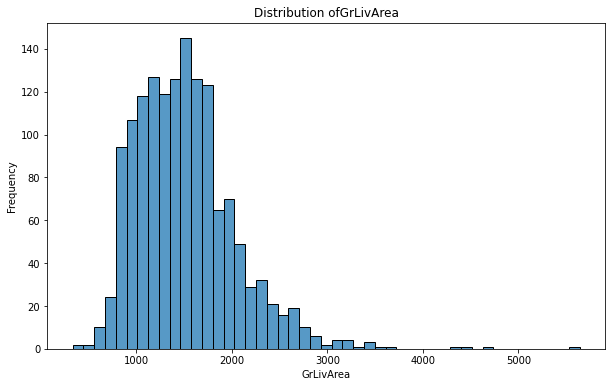

In [28]:
plot(df, 'GrLivArea')

# 3rd test:

In [30]:
from scipy.stats import pearsonr
data1 = df['SalePrice']
data2 = df['GrLivArea']

stat, p = pearsonr(data1, data2)
print(stat,p)
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

0.7086244776126521 4.518033646779944e-223
Probably dependent


In this analysis, we investigated the potential relationship between the sale price of properties and their corresponding Above grade (ground) living area square feet.

To assess the strength and significance of the relationship, we employed the Pearson correlation coefficient and conducted a hypothesis test. The Pearson correlation coefficient measures the linear association between two variables, ranging from -1 to 1, where values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values close to 0 suggest a weak or no linear correlation.

Our analysis revealed a correlation coefficient of 0.70 between the sale price and GrLivArea. The corresponding p-value was calculated as $10^{-223}$, which is commonly used to determine the statistical significance of the relationship. 

Based on our hypothesis test, we found that the p-value is less than the significance level of 0.05. Therefore, we reject the null hypothesis that the sale price and GrLivArea are independent. Consequently, we conclude that there is likely a significant relationship between the sale price and GrLivArea.

# 4th test:

## the correlation of overall condition and construction date

In [31]:
data1 = df['YearBuilt']
data2 = df['OverallCond']

stat, p = pearsonr(data1, data2)
print(stat,p)
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

-0.37598319560699034 3.090962045219238e-50
Probably dependent


This is an analysis of the potential relationship between the year a property was built and its overall condition. To ensure reliable results, any rows containing missing values in either of these columns were removed from the analysis.

Based on our analysis, we obtained a correlation coefficient of -0.37 between the year built and the overall condition of the properties. The associated p-value was calculated as $10^{-50}$. The p-value is commonly used to determine the statistical significance of a relationship.

Upon conducting a hypothesis test, we found that the p-value less than the significance level of 0.05. Therefore, we reject the null hypothesis that the year built and overall condition are independent. This indicates that there is likely a significant relationship between the year a property was built and its overall condition.

# 5th test:

## testing whether the price of houses in different neighboorhoods are significantly different

In [33]:
# Group the DataFrame by the 'Neighborhood' column
grouped = df.groupby('Neighborhood')


stat, p = stats.f_oneway(*[group['SalePrice'] for _, group in grouped])

print(stat, p)
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

71.78486512058278 1.5586002827707996e-225
Probably different distributions


This is an analysis of the differences in means among different neighborhoods based on prices. The DataFrame was grouped based on the 'Neighborhood' column, and the mean values of the SalePrice were compared among the groups using an ANOVA (Analysis of Variance) test.

The ANOVA test allows us to determine if there are significant differences in means among the groups. In this analysis, the F-statistic and corresponding p-value were calculated using the `f_oneway()` function from the `scipy.stats` module.

For the given dataset, the ANOVA test resulted in an F-statistic of 71.78 and a p-value of $10^{-225}$. The F-statistic measures the ratio of between-group variability to within-group variability, while the p-value indicates the statistical significance of the observed differences in means.

Based on the obtained results, if the p-value is less than the chosen significance level (usually 0.05), it suggests that there are significant differences in means among the groups. Conversely, if the p-value is greater than the significance level, it indicates that there is insufficient evidence to conclude that the means are different.

In this analysis, the obtained p-value less than the significance level. Therefore, we reject the null hypothesis that the means of the target variable are the same among the groups. This implies that there is likely significant differences in means among the groups.

It is important to note that the ANOVA test assumes certain assumptions, such as the normality of the data and equal variances among the groups. Violations of these assumptions may impact the validity of the results. Therefore, it is recommended to carefully assess the assumptions and consider additional analyses if necessary.